# Explore here

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
import seaborn as sns
import regex as re
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv");
df.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


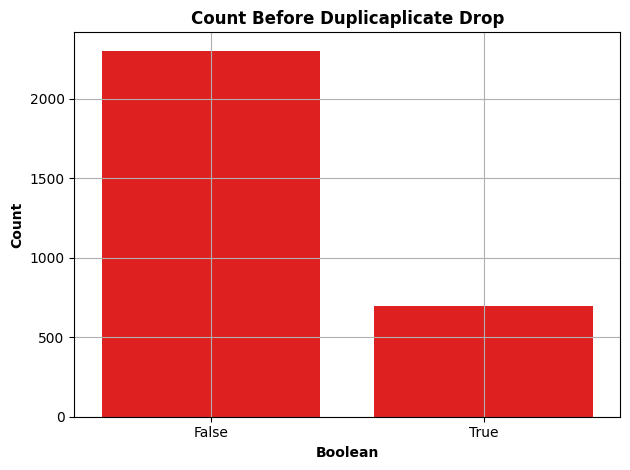

In [6]:
sns.countplot(df,x="is_spam",color='r')
plt.xlabel("Boolean",fontweight='bold')
plt.ylabel("Count",fontweight='bold')
plt.grid()
plt.title("Count Before Duplicaplicate Drop",fontweight='bold')
plt.tight_layout()
plt.show()

## Preprocessing ##
As a first step we will do a one hot encoding on the values if is_spam. Instead of True or False we willm have 0 or 1.

In [7]:
df["is_spam"] = df["is_spam"].apply(lambda x: 1 if x == np.bool("True") else 0).astype(int)
df.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,1
1,https://www.hvper.com/,1
2,https://briefingday.com/m/v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,0
4,https://briefingday.com/fan,1


(2999, 2)
True: 696
False: 2303


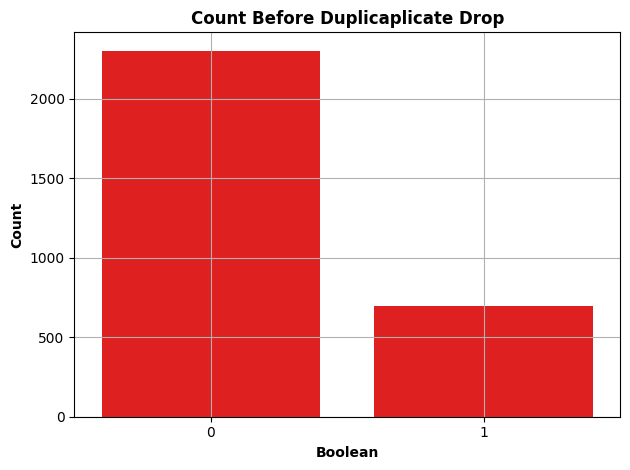

In [8]:
# Next we move to eliminate repeated values.
# First we print the shape of the dataframe as well as the number of True
# and false values.
print(df.shape)
print(f"True: {len(df.loc[df.is_spam==1])}")
print(f"False: {len(df.loc[df.is_spam==0])}")
sns.countplot(df,x="is_spam",color='r')
plt.xlabel("Boolean",fontweight='bold')
plt.ylabel("Count",fontweight='bold')
plt.grid()
plt.title("Count Before Duplicaplicate Drop",fontweight='bold')
plt.tight_layout()
plt.show()

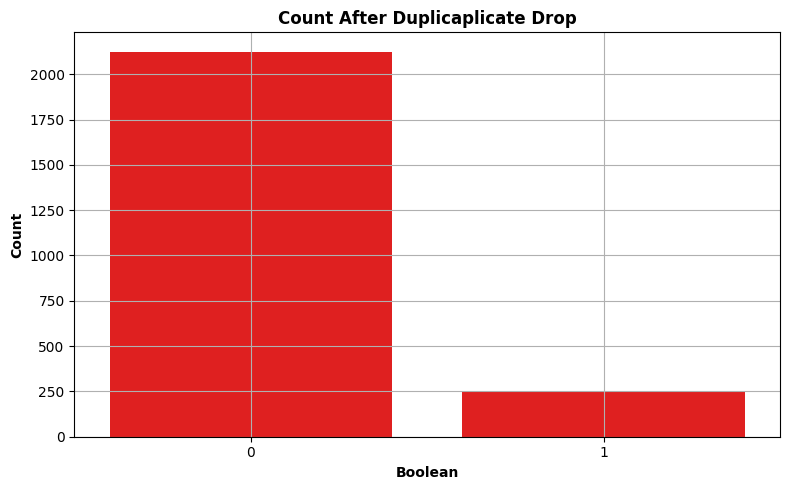

In [9]:
df2 = df.drop_duplicates()
df2 = df2.reset_index(inplace=False,drop=True)
df2.shape
plt.figure(figsize = (8,5))
sns.countplot(df2,x="is_spam",color='r')
#plt.pie(df, labels="is_spam", autopct='%.2f')
plt.xlabel("Boolean",fontweight='bold')
plt.ylabel("Count",fontweight='bold')
plt.grid()
plt.title("Count After Duplicaplicate Drop",fontweight='bold')
plt.tight_layout()
plt.show()


In [10]:
print(df2.shape)
print(f"True: {len(df2.loc[df2.is_spam==1])}")
print(f"False: {len(df2.loc[df2.is_spam==0])}")

(2369, 2)
True: 244
False: 2125


In [11]:
print(f" As total of {2999-2369} entries were duplicates and thefore dropped")

 As total of 630 entries were duplicates and thefore dropped


## Text Preprocessing ##
Now we begin with the test preprocessing. We remove white spaces, commas, and special characters from the strings and only keep the words.

In [12]:
def preprocess_text(text):
    """
    Preprocesses text to be used in an SVM model or the like.
    Removes white space, punctuation, and special characteres.
    Returns only the words on lower case.
    Parameters:
    text - String.
    """
    text = re.sub(r'[^a-z ]', " ", text)
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\s+', " ", text.lower())
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)
    return text.split()


    

In [13]:
# Apply the function 

df2["url"] = df2['url'].apply(preprocess_text)
df2.head()

,url,is_spam
0,"[https, briefingday, us, list, manage, com, un...",1
1,"[https, www, hvper, com]",1
2,"[https, briefingday, com, v, i]",1
3,"[https, briefingday, com, m, commentform]",0
4,"[https, briefingday, com, fan]",1


### Lemmatization ###

The next step in the text preprocessing is lemmatization. As far as I understand this step involves reducing groups of words from their specific definitions in context to a more abstract, connotation based categorization.

In [14]:
from nltk import download
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
download("wordnet")
lemmatizer = WordNetLemmatizer()
download("stopwords")

stw = stopwords.words("english")

def lmtxt(words,lemmatizer=lemmatizer):
    """
    Returns words as lemmatized tokens
    parameters:
    words: words
    
    """
    tokens = [lemmatizer.lemmatize(w) for w in words]
    tokens = [word for word in tokens if word not in stw]
    tokens = [w for w in tokens if len(w)>3]
    return tokens
df2["url"] = df2["url"].apply(lmtxt)
df2.head()



[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,url,is_spam
0,"[http, briefingday, list, manage, unsubscribe]",1
1,"[http, hvper]",1
2,"[http, briefingday]",1
3,"[http, briefingday, commentform]",0
4,"[http, briefingday]",1


## WordCloud ##

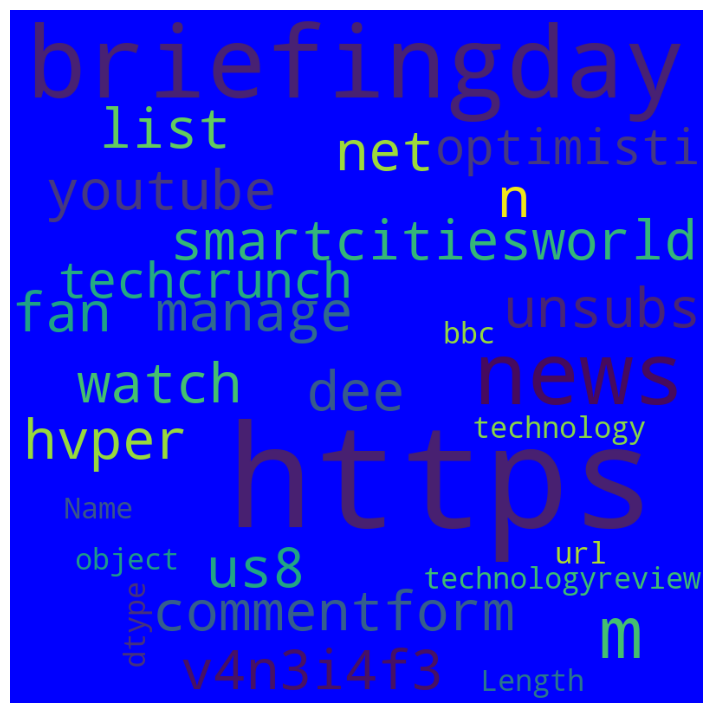

In [15]:
wordcloud = WordCloud(width=800,height=800,background_color='blue',max_words=1000,min_font_size=20,random_state=42).generate(str(df['url']))
fig = plt.figure(figsize=(9,9),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## CountVectorizer ##
Lastly, we need to encode the values into numeric values for the Model.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

token_list = df2['url']
token_list = [" ".join(token) for token in token_list]

vectorizer = TfidfVectorizer(max_features = 5000,max_df=5)
X = vectorizer.fit_transform(token_list).toarray()
y = df2['is_spam']

X[:5]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5, 4267))

In [17]:
# Data Splitting 

X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2,random_state=42)

In [92]:
X_train.shape,y_train.shape

((1895, 4267), (1895,))

## Model Creation and Optimization ##

In [93]:
from sklearn.svm import SVC
model = SVC(kernel='linear',random_state=42)
model.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [94]:
# Model Prediction

y_p = model.predict(X_test)
y_p[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [95]:
# Accuracy

from sklearn.metrics import accuracy_score

accuracy_score(y_p,y_test)

0.9156118143459916

In [ ]:
# Optimize Model Performance

import numpy as np
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [1, 10, 100],
    "kernel": ["poly", "rbf", "sigmoid"],
    "degree": [3, 4, 5],
    "gamma": ["scale", "auto"]
}

# We initialize the random search
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42),
             param_grid={'C': [1, 10, 100, 1000], 'degree': [3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid', 'precomputed’']},
             scoring='accuracy')

In [96]:
grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.lo

Best hyperparameters: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
from sklearn.svm import SVC
m2 = SVC(C=10,kernel='rbf',gamma='scale',degree=3,random_state=42)
m2.fit(X_train,y_train)

SVC(C=10, random_state=42)

In [21]:
y_predict = m2.predict(X_test)
accuracy_score(y_predict,y_test)


0.9156118143459916

In [22]:
m3 = SVC(C=1000,kernel='poly',gamma='auto',degree=2,random_state=42)
m3.fit(X_train,y_train)

SVC(C=1000, degree=2, gamma='auto', kernel='poly', random_state=42)

In [23]:
m3_predict = m3.predict(X_test)
accuracy_score(m3_predict,y_test)

0.9177215189873418

In [24]:
m4 = SVC(C=1000,kernel='poly',gamma='auto',degree=1,random_state=42)
m4.fit(X_train,y_train)

SVC(C=1000, degree=1, gamma='auto', kernel='poly', random_state=42)

In [25]:
m4_pred = m4.predict(X_test)
accuracy_score(m4_pred,y_test)

0.9177215189873418

## Saving the Model ##

In [27]:
from pickle import dump

dump(m4, open("svm_classifier_42.sav", "wb"))